In [11]:
from IPython.display import HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides
!pip install git+https://github.com/renatopp/liac-arff@master
!pip install git+https://github.com/openml/openml-python.git@develop
!pip install mglearn
from IPython.display import set_matplotlib_formats, display, HTML
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openml as oml
import mglearn
import os
from cycler import cycler
from pprint import pprint

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
#plt.rcParams['lines.linewidth'] = 1
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
                           cycler('linestyle', ['-', '--', ':',
                                                '-.', '--'])
                           )
       )

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

np, mglearn

# Prints outputs in cells so that we don't have to write print() every time 
#InteractiveShell.ast_node_interactivity = "all"

# Matplotlib tweaks for presentations
plt.rcParams["figure.figsize"] = (5, 3)
plt.rcParams["figure.max_open_warning"] = -1
plt.rcParams['font.size'] = 8; 
plt.rcParams['lines.linewidth'] = 0.5


# Presentations
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': '95%', 'height': 786, 'scroll': True, 'theme': 'solarized', 'transition': 'fade', 'overflow': 'visible', 'start_slideshow_at': 'selected'})

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)



  Cloning https://github.com/renatopp/liac-arff (to master) to /tmp/pip-7tkorfcm-build
  Running setup.py install for liac-arff ... - done
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Cloning https://github.com/openml/openml-python.git (to develop) to /tmp/pip-80c84rn3-build
    100% |████████████████████████████████| 61kB 3.0MB/s 
    100% |████████████████████████████████| 163kB 4.2MB/s 
    100% |████████████████████████████████| 40kB 5.4MB/s 
    100% |████████████████████████████████| 102kB 5.1MB/s 
    100% |████████████████████████████████| 51kB 7.0MB/s 
    100% |████████████████████████████████| 112kB 4.6MB/s 
    100% |████████████████████████████████| 102kB 6.7MB/s 
    2% |▊                               | 143kB 9.6MB/s eta 0:00:01

    100% |████████████████████████████████| 6.8MB 187kB/s 
    100% |████████████████████████████████| 256kB 3.7MB/s 
    100% |████████████████████████████████| 1.6MB 716kB/s 
  Running setup.py bdist_wheel for PyYAML ... - \ done
  Stored in directory: /content/.cache/pip/wheels/03/05/65/bdc14f2c6e09e82ae3e0f13d021e1b6b2481437ea2f207df3f
  Running setup.py bdist_wheel for netifaces ... - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/a9/dc/b4/ed4577d960811e37fde4718b2b615da8e3352bd54c23731622
  Running setup.py bdist_wheel for wrapt ... - \ done
  Stored in directory: /content/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
Successfully built PyYAML netifaces wrapt
  Found existing installation: PyYAML 3.11
    Uninstalling PyYAML-3.11:
      Successfully uninstalled PyYAML-3.11
  Running setup.py install for openml ... - \ done
You are using pip version 9.0.3, however version 10.0.1 is available.
You should cons

    100% |████████████████████████████████| 542kB 1.8MB/s 
  Running setup.py bdist_wheel for mglearn ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/3b/81/34/a54d61d5d108dfcb016bcd8f4f7d8cc0538994f07704714b8d
Successfully built mglearn
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Foundations of Data Mining: Fashion-MNIST Challenge

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [0]:
# %matplotlib inline
# from preamble import *
# plt.rcParams['figure.dpi'] = 200 # This controls the size of your figures
# plt.rcParams['savefig.dpi'] = 200 # This controls the size of your figures
# # Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 
import sklearn.decomposition as deco
from sklearn.cluster import KMeans 
from sklearn.metrics import confusion_matrix
import numpy as np

In [0]:
# Please fill in your names here
NAME_STUDENT_1 = "Jan-Niklas Schneider 1260421"
NAME_STUDENT_2 = ""

## Fashion-MNIST
The [Fashion-MNIST dataset](https://www.openml.org/d/40996) contains 70,000 images of Zalando fashion products, classified into 10 types of clothing, each represented by 28 by 28 pixel values. We can easily download it from OpenML and visualize one of the examples:

In [0]:
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [0]:
fmnist_data = oml.datasets.get_dataset(40996) # Download MNIST data
# Get the predictors X and the labels y
X, y = fmnist_data.get_data(target=fmnist_data.default_target_attribute); 

In [0]:
# build a list of figures for plotting
def buildFigureList(fig, subfiglist, titles, length):
    
    for i in range(0,length):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a=fig.add_subplot(1,length,i+1)
        imgplot =plt.imshow(pixels, cmap='gray_r')
        a.set_title(titles[i], fontsize=6)
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return

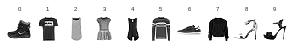

In [16]:
subfiglist = []
titles=[]

for i in range(0,10):
    subfiglist.append(X[i])
    titles.append(i)

buildFigureList(plt.figure(1),subfiglist, titles, 10)
plt.show()

## Question 2. Analyzing image data with neural embedding

*In this part of the assignment, rather than working on the whole dataset you will implement representation learning on one part of the data and analyze the second part of the data with the learned representations.*

Use the provided code to split the training dataset in two subset based on their class labels. Dataset 1, containing classes 0 to 4 and Dataset 2 classes 5 to 9. 

### a ) Develop a model for learning representations (4 points)

Develop a convolutional neural network model for classification on Dataset 1 using the Keras python library.

You are free to choose your model architecture such that:
- You need to justify the decisions for selecting the layers, activation functions and loss function. (Add a text cell where you can write your justification)
- Your model must have one dense layer with 64 neurons and ReLU activation that is not the first nor the last layer in the model. We will refer to this layer as a 'neural code' (set **name='neural_codes'** parameter in your code for that layer).


In [17]:
# Do not modify this cell
# Extra imports for kears layers, matplotlib and nearestneigbors
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, InputLayer
from keras.utils import to_categorical
from keras import backend as K
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

Using TensorFlow backend.


In [18]:
## Do not modify this cell
# Load and reshape the data
img_rows, img_cols, chns = 28, 28, 1
n_classes = 10

x_train = X
y_train = y

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], chns, img_rows, img_cols)
    #x_test = x_test.reshape(x_test.shape[0], chns, img_rows, img_cols)
    input_shape = (chns, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, chns)
    #x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, chns)
    input_shape = (img_rows, img_cols, chns)

    y_train = to_categorical(y_train, n_classes)

    
# Split the data in two datasets 
indexes1 = np.where(np.argmax(y_train, axis=1) <= 4)
indexes2 = np.where(np.argmax(y_train, axis=1) > 4)
dataset_1 = x_train[indexes1]
y_dataset1 = y_train[indexes1]
dataset_2 = x_train[indexes2]
y_dataset2 = y_train[indexes2]

print ("Dataset 1 shape: ", dataset_1.shape)    
print ("Dataset 2 shape: ", dataset_2.shape)    
print("Dataset 1 labels shape: ", y_dataset1.shape)
print("Dataset 2 labels shape: ", y_dataset2.shape)


Dataset 1 shape:  (35000, 28, 28, 1)
Dataset 2 shape:  (35000, 28, 28, 1)
Dataset 1 labels shape:  (35000, 10)
Dataset 2 labels shape:  (35000, 10)


In [0]:
# Implement your model here
relu = 'relu'

model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (4, 4), padding='same', activation=relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, (4, 4), activation=relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(64, activation=relu, name='neural_codes'))
model.add(BatchNormalization())
model.add( Dense(10, activation='softmax'))

In [0]:
# Do not modify this cell
# Execute this cell before training!
# This is the model for extracting the image neural codes from the trained model
neural_codes_model = Model(inputs=model.input, outputs=model.get_layer("neural_codes").output)

In [21]:
# Trainning loop 
# given parameters are just a suggestion
batch_size = 64
epochs = 10

loss_func = 'categorical_crossentropy'
opt = 'adam'
acc = 'accuracy'

model.compile(loss=loss_func, optimizer=opt, metrics=[acc]) 
model.fit(dataset_1, y_dataset1,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.1)

Train on 31500 samples, validate on 3500 samples
Epoch 1/10
31500/31500 [==============================] - 13s 424us/step - loss: 0.4823 - acc: 0.8372 - val_loss: 0.2780 - val_acc: 0.9017
Epoch 2/10
31500/31500 [==============================] - 12s 384us/step - loss: 0.2863 - acc: 0.8986 - val_loss: 0.2312 - val_acc: 0.9163
Epoch 3/10
 9664/31500 [========>.....................] - ETA: 8s - loss: 0.2554 - acc: 0.9108

31500/31500 [==============================] - 12s 378us/step - loss: 0.2464 - acc: 0.9127 - val_loss: 0.2278 - val_acc: 0.9234
Epoch 4/10
31500/31500 [==============================] - 12s 380us/step - loss: 0.2272 - acc: 0.9188 - val_loss: 0.2171 - val_acc: 0.9200
Epoch 5/10
25728/31500 [=======================>......] - ETA: 2s - loss: 0.2120 - acc: 0.9246

31500/31500 [==============================] - 12s 376us/step - loss: 0.2115 - acc: 0.9247 - val_loss: 0.1991 - val_acc: 0.9237
Epoch 6/10
31500/31500 [==============================] - 12s 374us/step - loss: 0.1975 - acc: 0.9297 - val_loss: 0.2304 - val_acc: 0.9154
Epoch 7/10
27520/31500 [=========================>....] - ETA: 1s - loss: 0.1851 - acc: 0.9343

31500/31500 [==============================] - 12s 382us/step - loss: 0.1850 - acc: 0.9341 - val_loss: 0.1807 - val_acc: 0.9374
Epoch 8/10
31500/31500 [==============================] - 12s 381us/step - loss: 0.1790 - acc: 0.9342 - val_loss: 0.1794 - val_acc: 0.9354
Epoch 9/10
28288/31500 [=========================>....] - ETA: 1s - loss: 0.1693 - acc: 0.9402

31500/31500 [==============================] - 12s 380us/step - loss: 0.1700 - acc: 0.9397 - val_loss: 0.1809 - val_acc: 0.9394
Epoch 10/10
31500/31500 [==============================] - 12s 378us/step - loss: 0.1638 - acc: 0.9404 - val_loss: 0.1698 - val_acc: 0.9406



### b) Generate neural codes (1 point) 
Process all the images from Data set 2 with the trained model from **a)** and save the activations from the 'neural code' layer 

In [0]:
# Implement here
# Note: Using neural_codes_model compute the neural code for the images in dataset_2 

neural_codes = neural_codes_model.predict(dataset_2)
np.save('neural_codes.npy', neural_codes)

### c) Analyze the neural codes (3 points) 

Implement the following analysis of the neural codes computed in ** b) **:

- Compute and show the mean and the first two principle components as images (see note below)
- Make a 2-dimensional scatter plot of the transformed data
- Compute and show a small number of samples along each of the two main axes as images
- Compute and show a sample of input images along each of the two main axes as images
- Compare the results of this analysis with the results of the analysis in part one where you worked on the data in the high dimensional (image) space. 

*Note: To produce an image from a arbitrary neural code use nearest neighbor to find the closest neural code from the training dataset (code is provided in the next cell)* 

In [23]:
# Do not modify this cell
# This code will give you a method for getting the index of the closest neural code neighbor 
# (see example code in the next cell)
neigh = NearestNeighbors(n_neighbors=5, p=2)
neigh.fit(neural_codes)

def get_closest_neighbor(code):
    distances, indexes = neigh.kneighbors([code])
    return indexes[0, 1]


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

Neural code:  [1.188 0.    0.511 0.647 0.137 0.511 0.    0.    0.    0.    0.    0.442
 0.    0.    0.028 0.    0.187 0.    0.    0.06  0.056 0.    0.    1.026
 0.    0.    0.    0.    0.    0.641 1.084 0.    0.262 1.478 0.135 1.079
 1.001 0.    0.    0.052 0.    0.    0.24  0.    0.438 1.672 0.027 0.002
 0.    0.    0.723 0.215 0.651 0.772 0.    0.214 0.169 0.194 0.577 0.187
 0.093 0.    1.001 0.   ]


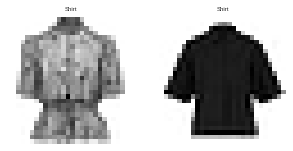

In [24]:
# Example code for finding a neighbors based on the neural codes 

# Select a random image from the dataset 
index = 123
# Get its neural code
print("Neural code: ", neural_codes[index])
# Get its closest neighbor
index_neighbor = get_closest_neighbor(neural_codes[index])

# Build the figure
subfiglist = []
titles = []
subfiglist.append(np.squeeze(dataset_2[index], axis=2))
titles.append(fmnist_classes[np.argmax(y_dataset2[index])])
subfiglist.append(np.squeeze(dataset_2[index_neighbor], axis=2))
titles.append(fmnist_classes[np.argmax(y_dataset2[index_neighbor])])

buildFigureList(plt.figure(1),subfiglist, titles, 2)

In [0]:
# Develop solution here

# methods for plotting data
name = 'binary'


def plot_as_in_lecture(fig, subfiglist):
    for i in range(0,25):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((8, 8))
        a=fig.add_subplot(5,5,i+1)
        imgplot =plt.imshow(pixels, cmap=name)
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return
  
def plot_as_in_lecture_2(fig, subfiglist):
    for i in range(0,25):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a=fig.add_subplot(5,5,i+1)
        imgplot =plt.imshow(pixels, cmap=name)
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return
 
def plot_comp_mean_w_neighbor(pca):
  fig = plt.figure(1, figsize=(15,10))
  for i in range(3): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    if (i == 2):
      ax.set_xlabel('mean')
      index_neighbor = get_closest_neighbor(pca.mean_)
      image = dataset_1[index_neighbor]
      pixels = np.array(image, dtype='float')
      pixels = pixels.reshape((28, 28))
      ax.imshow(pixels, cmap=plt.get_cmap(name));
    else:
      ax.set_xlabel('component {}'.format(i))
      index_neighbor = get_closest_neighbor(pca.components_[i])
      image = dataset_1[index_neighbor]
      pixels = np.array(image, dtype='float')
      pixels = pixels.reshape((28, 28))
      ax.imshow(pixels, cmap=plt.get_cmap(name));
  plt.show;

def plot_comp_mean(pca):
  fig = plt.figure(1, figsize=(15,10))
  for i in range(3): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    if (i == 2):
      ax.set_xlabel('mean')
      ax.imshow(np.reshape(pca.mean_, (8,8)), cmap=plt.get_cmap(name));
    else:
      ax.set_xlabel('component {}'.format(i))
      ax.imshow(np.reshape(pca.components_[i], (8,8)), cmap=plt.get_cmap(name));
  plt.show;
  
def plot_scatter_pca(X_pca, y_plt):
  fig = plt.figure(1, figsize=(15,10));
  plt.scatter(X_pca[:,0],X_pca[:,1], marker='o', c=y_plt,alpha=0.7);
  plt.show;
  
def compute_new_data(X_pca, pca):
  mean, std = np.mean(X_pca, axis=0), np.std(X_pca, axis=0)
  min_, max_ = mean - 1.5*std, mean + 1.5*std

  X_temp = np.arange(min_[0], max_[0]+1, (max_[0] - min_[0])/4)
  Y_temp = np.arange(min_[1], max_[1]+1, (max_[1] - min_[1])/4)
  X_new = np.array([[x, y] for x in X_temp for y in Y_temp])
  X_new = pca.inverse_transform(X_new)
  return X_new

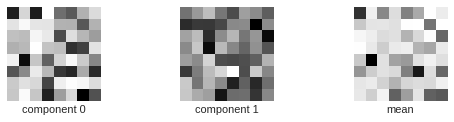

In [26]:
# Compute and show the mean and the first two principle components as images (see note below)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

neural_codes = np.load('neural_codes.npy')
X_nc = pca.fit_transform(neural_codes)

plot_comp_mean(pca)

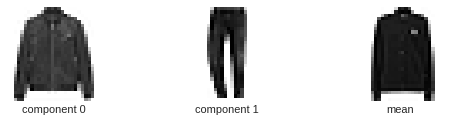

In [27]:
plot_comp_mean_w_neighbor(pca)

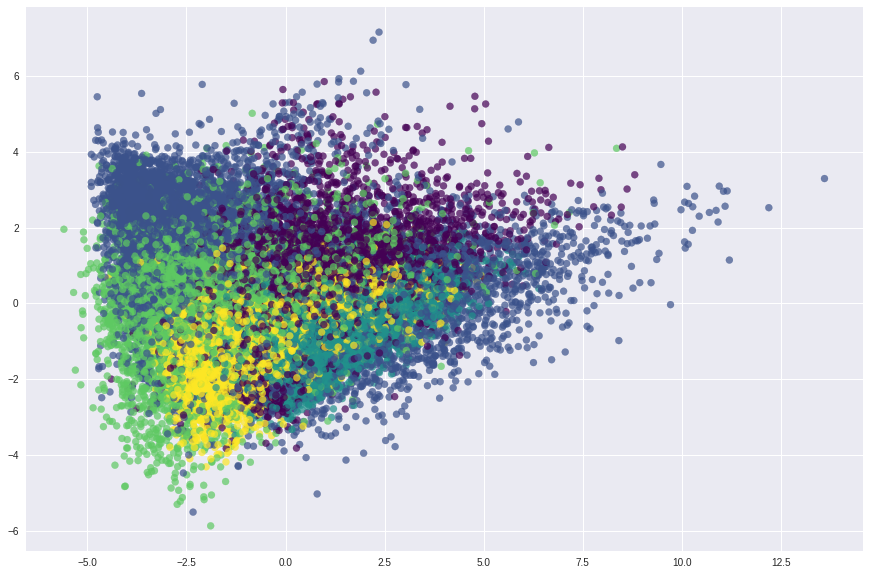

In [28]:
# Make a 2-dimensional scatter plot of the transformed data
plot_scatter_pca(X_nc, y_plt=np.argmax(y_dataset2, axis=1))

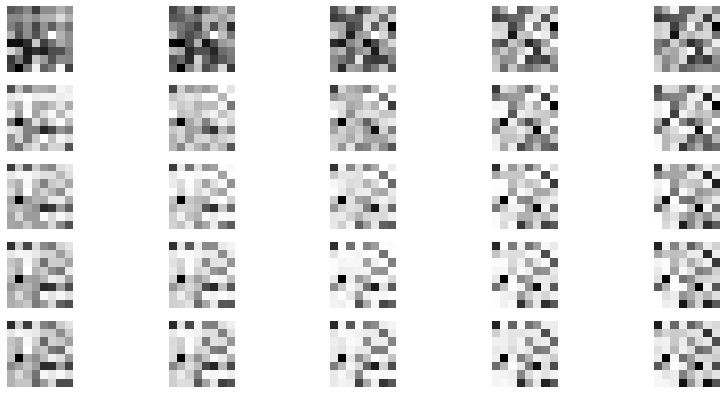

In [29]:
# Compute and show a small number of samples along each of the two main axes as images

X_new = compute_new_data(X_nc, pca)
plot_as_in_lecture(plt.figure(1, figsize=(14, 7)), X_new)
plt.show();

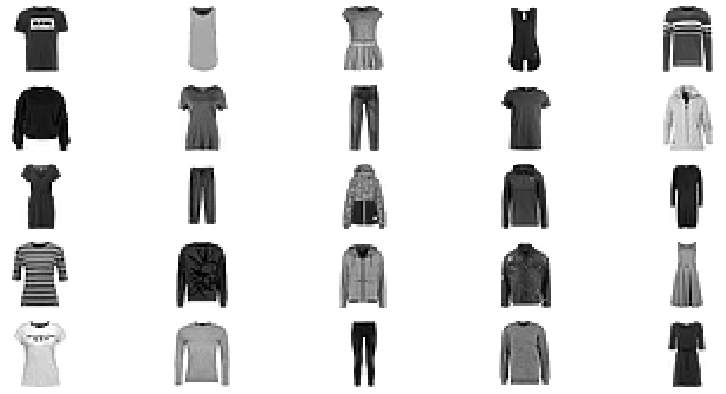

In [30]:
# Compute and show a sample of input images along each of the two main axes as images
plot_as_in_lecture_2(plt.figure(1, figsize=(14, 7)), dataset_1)
plt.show();

# Compare the results of this analysis with the results of the analysis in part one where you worked on the data in the high dimensional (image) space.

A major difference between the first part and this part is ,firstly, how the data was represented by pca and by the neural codes and , secondly, how much information we can reconstruct using both methods. In the first point pca does a decent job at representing data in 2 components that still resembles pieces of clothing when plotted as images. Certain details such as a zipper remain distinguishable. The neural code, however, performs in this aspect poorly. We have an image that does not represent anything closely related to clothing. It may very much look like white noise. On the second point the reconstruction the neural network performs much better. We see that pca is unable to reconstruct the images properly. Many details are completed lost which is to be attributed to the explained variance ration of the two components. Assuming we could reconstruct the data back to its initial state then this ratio would 100% but this is very naive thought as two components may not represent this much of the original data. The neural code reconstructs the data very well. We get back data that is like the original data such that details as logos on shirts are all present.

### d) Analyze a cluster computed by k-means (2 Points)
- Run k-means on neural code from Dataset 2 with k=5 using k-means++ and random_state=0
- Compute and show a confusion matrix of the clusters with respect to the original labels.

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
y_pred = kmeans.fit_predict(neural_codes)

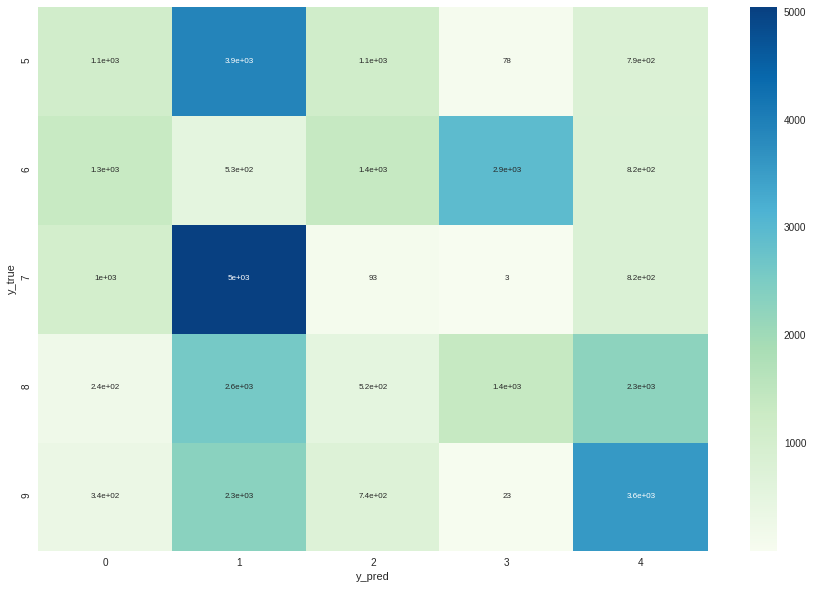

In [32]:
import seaborn as sns

df = pd.DataFrame({'y_true': np.argmax(y_dataset2, axis=1), 'y_pred': y_pred})
ct = pd.crosstab(df['y_true'], df['y_pred'])

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(ct, annot=True, ax=ax, cmap='GnBu')